In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

## When to use transformation

* Linear regression- gradient descent --global minima
* KNN, K Means, hierarchical clustering --euclean distance
* Neural networks

## Standardization and Normalization

We try to bring all the variables or features  to a similar scale. Standization means centering variable at zero

z = (x - x_mean) / std

In [8]:
df = get_df('titanic.csv',cols=['Pclass','Age','Fare','Survived'])

In [9]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [10]:
df.Age.fillna(df.Age.median(),inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

**fit vs fit_transform**
It applies transformation column wise feature by feature

**Fit:**

When you use the "fit" method on a transformer, you are essentially calculating the parameters needed for that particular transformation based on the data you provide.
For example, if you're using a scaler (e.g., StandardScaler), calling fit calculates the mean and standard deviation of the data. These parameters are then used to transform the data.
The "fit" method is used to learn the parameters of a model or transformation from the training data.

**Fit_Transform:**

The "fit_transform" method combines the "fit" and "transform" steps into a single operation.
It first calculates the parameters using the "fit" step and then applies the transformation to the data in a single step.
This can be more efficient than calling "fit" and then "transform" separately, especially when working with large datasets.

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [14]:
df_scaled.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


<Axes: xlabel='1', ylabel='Count'>

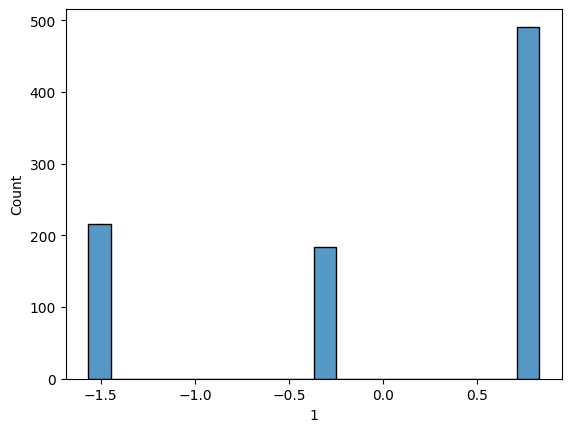

In [15]:
sns.histplot(df_scaled.iloc[:,1],bins=20)

<Axes: xlabel='2', ylabel='Count'>

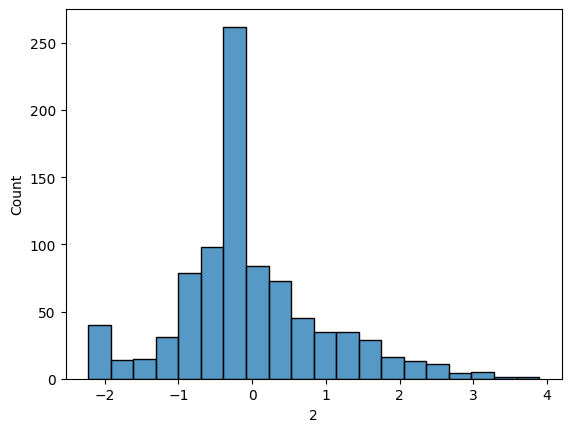

In [16]:
sns.histplot(df_scaled.iloc[:,2],bins=20)

<Axes: xlabel='3', ylabel='Count'>

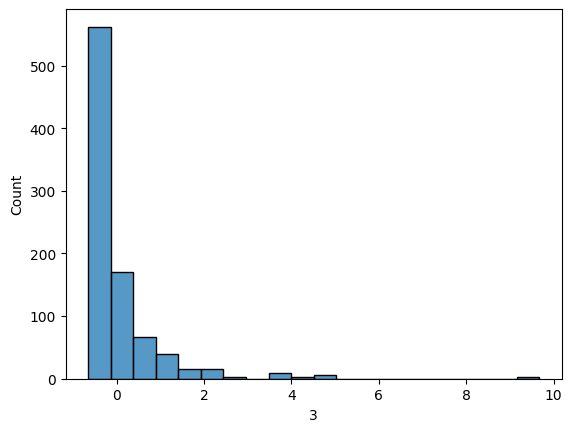

In [19]:
sns.histplot(df_scaled.iloc[:,3],bins=20)

### Min Max Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# range 0 to 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [34]:
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


<Axes: xlabel='Pclass', ylabel='Count'>

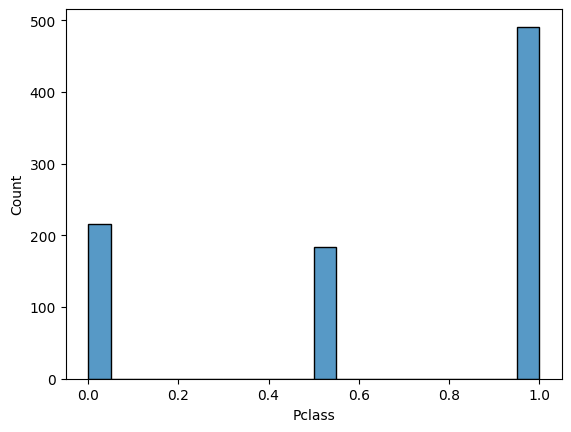

In [35]:
sns.histplot(df_scaled['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

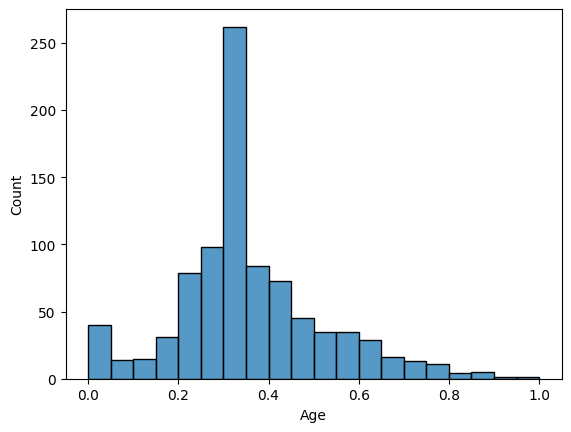

In [36]:
sns.histplot(df_scaled['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

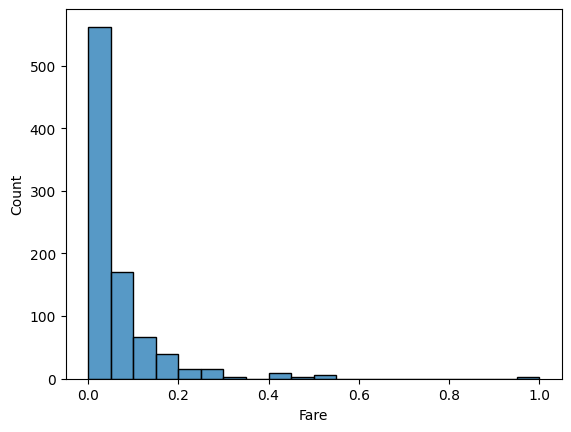

In [37]:
sns.histplot(df_scaled['Fare'],bins=20)

### Robust Scaler

IQR = 75th quantile - 25th quantile
X_scaled = (X-X.median)/IQR

In [38]:
from sklearn.preprocessing import RobustScaler

In [40]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: xlabel='Pclass', ylabel='Count'>

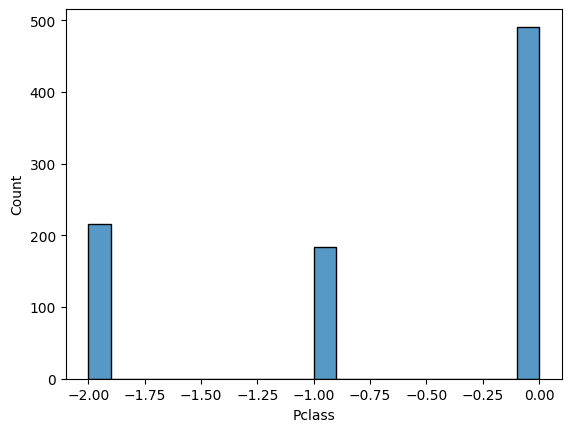

In [42]:
sns.histplot(df_scaled['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

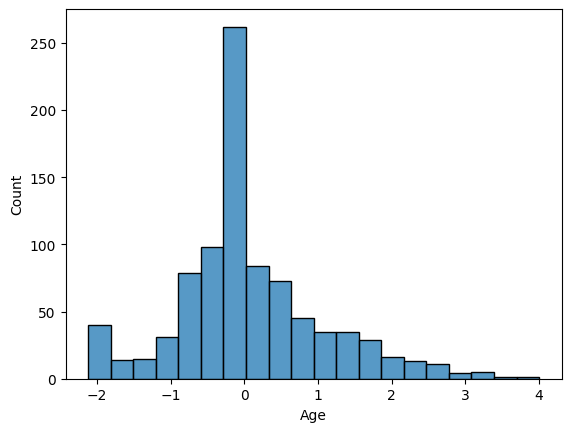

In [43]:
sns.histplot(df_scaled['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

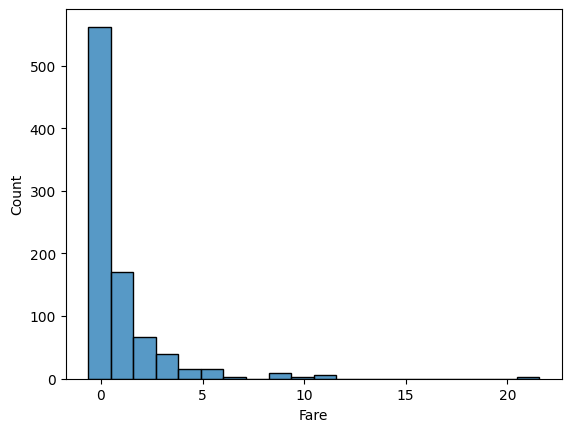

In [44]:
sns.histplot(df_scaled['Fare'],bins=20)

## Gaussian Transformation
**Any transformation to normal distribution**

### Logarithmic Transformation

In [47]:
df = get_df('titanic.csv',cols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [52]:
import scipy.stats as stat
import pylab

In [56]:
def get_plot(df,var):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[var],bins=20)
    plt.subplot(1,2,2)
    stat.probplot(df[var],dist='norm',plot=pylab)
    plt.tight_layout()
    plt.show()

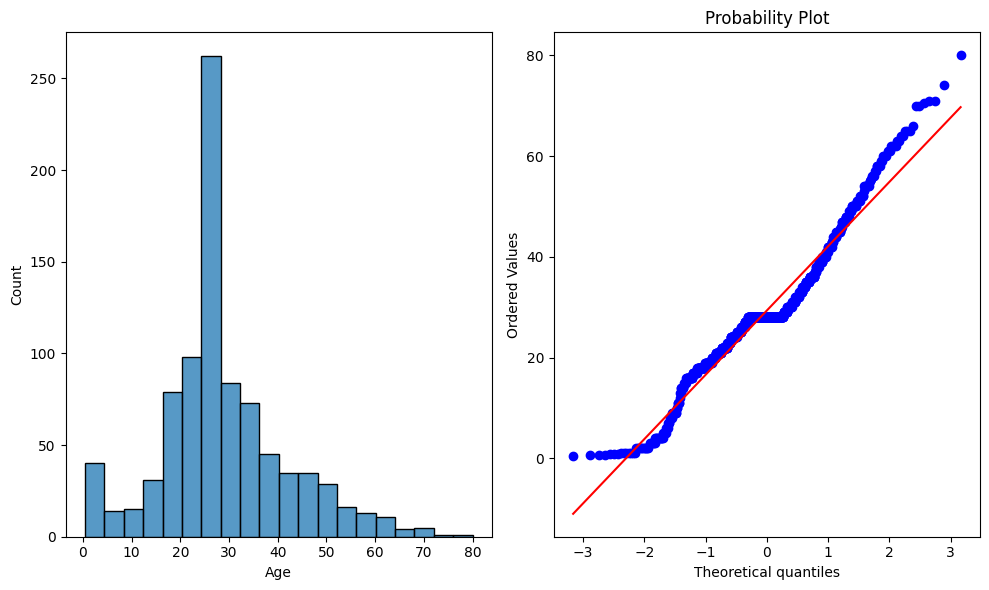

In [59]:
df['Age_log'] = np.log(df['Age'])
get_plot(df,'Age')

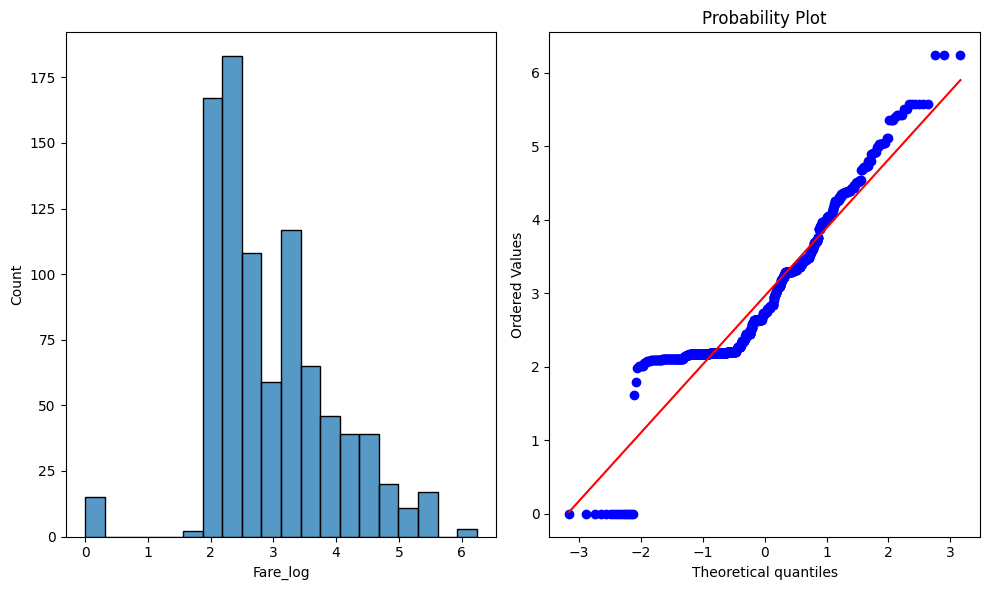

In [73]:
df['Fare_log'] = np.log1p(df['Fare'])
get_plot(df,'Fare_log')

### Reciprocal Transformation

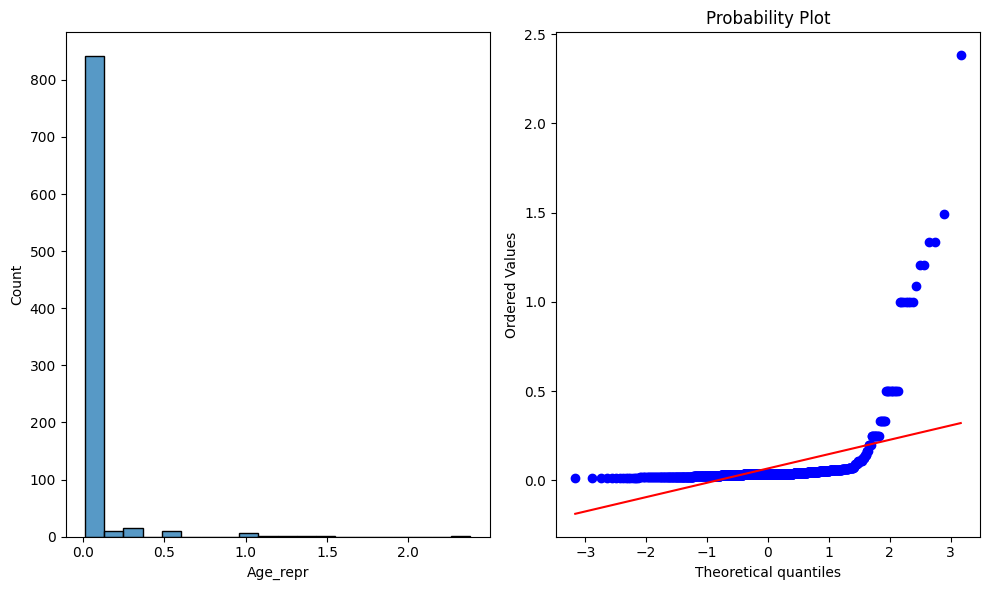

In [61]:
df['Age_repr'] = 1/df['Age']
get_plot(df,'Age_repr')

### Square root Transformation

In [67]:
import math

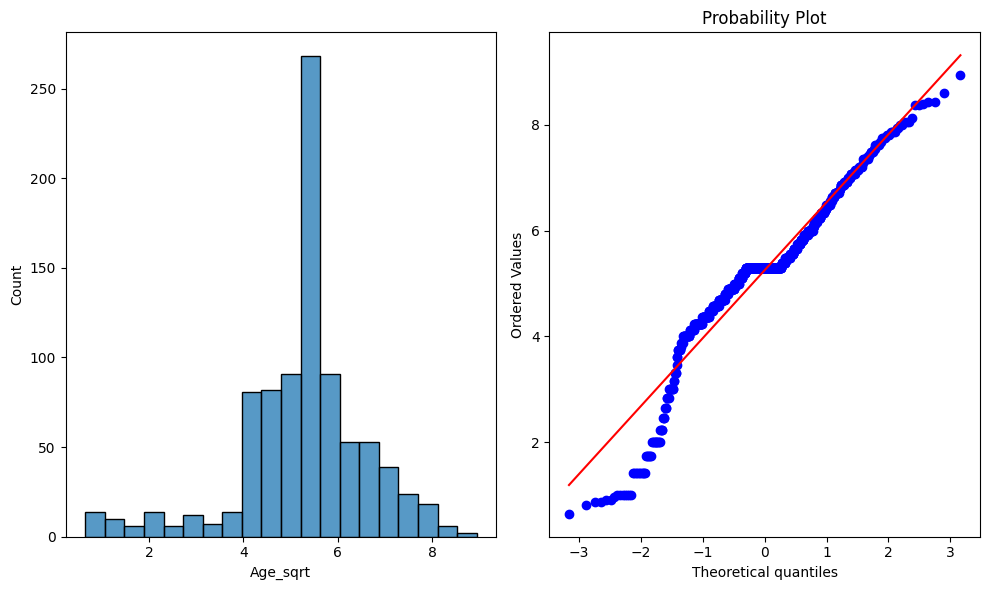

In [68]:
df['Age_sqrt'] = df['Age'].apply(lambda x: math.sqrt(x))
get_plot(df,'Age_sqrt')

### Exponential Transformation

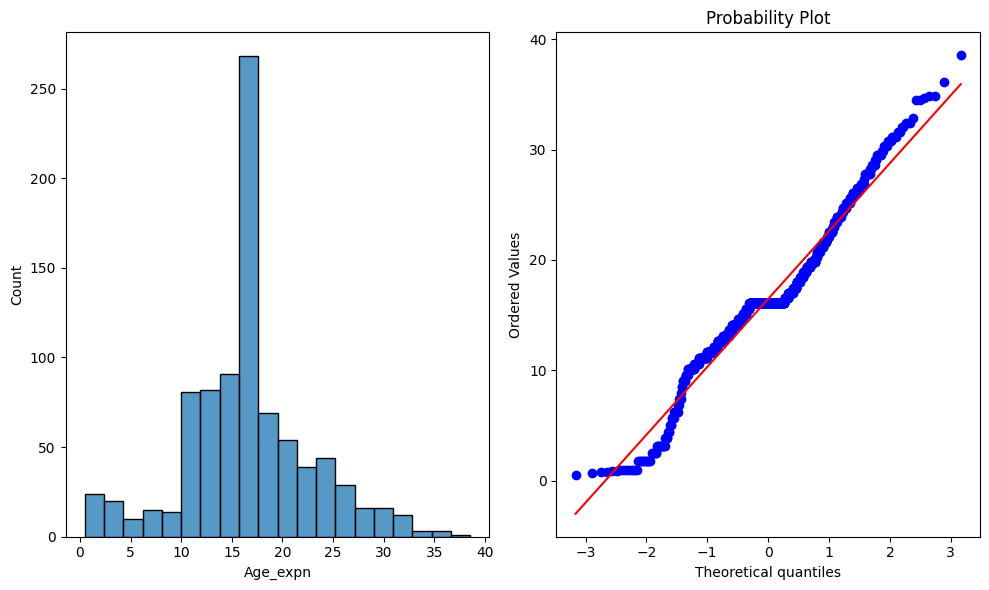

In [69]:
df['Age_expn'] = df['Age']**(1/1.2)
get_plot(df,'Age_expn')

### BoxCox Transformation

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSa_gNJKVxWSczYNRMUtj88fZxKSdRbCyCuuTZzJrbms7S6MoAY&s=10)

In [71]:
df['Age_boxcox'],parameters = stat.boxcox(df['Age'])

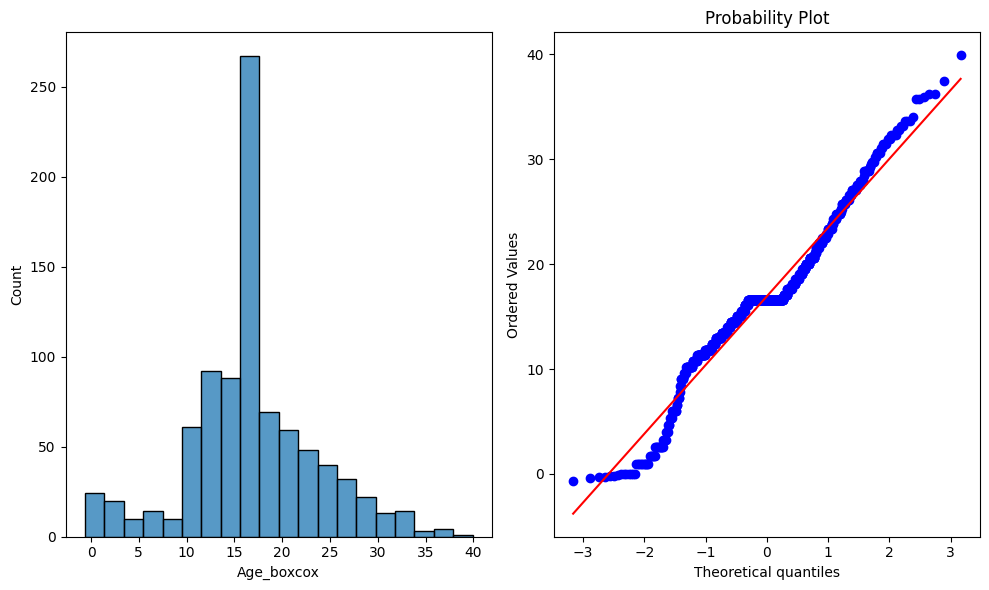

In [72]:
get_plot(df,'Age_boxcox')